# 探索泰坦尼克号数据



## 1. 观察数据

In [1]:
#coding:utf-8
import pandas as pd

In [2]:
pd.read_csv("titanic-data.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


名词解释：
* PassengerId：乘客ID（int类型）
* Survived：是否幸存（0 = No, 1 = Yes）（int类型）
* Pclass：船舱等级（1 = 1st, 2 = 2nd, 3 = 3rd）（int类型）
* Name：乘客名字 （str类型）
* Sex：乘客性别 （female、male）（str类型）
* Age：乘客年龄（NaN）数据有缺失（float）
* SibSp：兄弟姐妹和配偶数量（int类型）
* Parch：父母与子女数量（int类型）
* Ticket：票的编号（int和 str）
* Fare：票价（float类型）
* Cabin：客舱号码、座位号（str类型，有缺失）
* Embarked：乘客登船码头 （srt类型 有缺失）

## 2. 提出问题

1. 乘客年龄与票价是否呈现正相关的特性
2. 在所有乘客中，男女比例各占多少
3. 在所有生还者中，男女比例各占多少
4. 生还概率与船舱等级是否有相关性
5. 生还概率与父母子女数量是否有相关性

## 3. 数据清洗

In [3]:
ori_data = pd.read_csv("titanic-data.csv")
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


   观察数据可以发现，**年龄、客舱号码、乘客登船码头**均有不同程度的缺失，  
   由于要对年龄进行相关性分析，所以要在这里进行数据清洗，将<font color=red>年龄</font>中为空的数据筛除掉，  
   而<font color=gray>客舱号码、乘客登船码头</font>不作为本次数据分析的变量，所以无需处理

In [4]:
#将年龄中为空的数据筛除掉
age_fare_analy_data = ori_data.dropna(subset=['Age'])
age_fare_analy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


## 4. 分析数据

### 4.1 乘客年龄与票价是否呈现正相关的特性

In [5]:
#乘客年龄与票价是否呈现正相关的特性
age_axis_x = age_fare_analy_data['Age']
fare_axis_y = age_fare_analy_data['Fare']

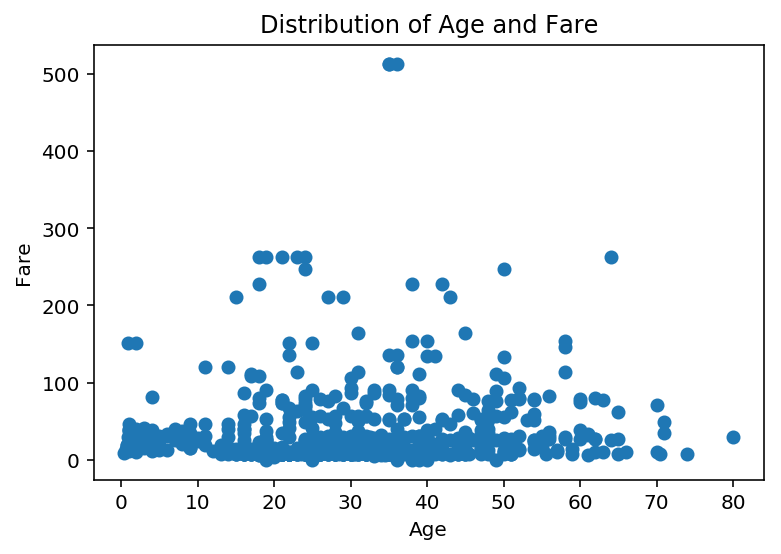

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.scatter(age_axis_x, fare_axis_y)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Distribution of Age and Fare');

    由散点图可以粗略的观察到，乘客年龄与票价并没有呈现明显的正相关特性
    由此猜测，票价是否与其他因素更具有正相关的特性，如收入等

### 4.2 在所有乘客中，男女比例各占多少

male      577
female    314
Name: Sex, dtype: int64


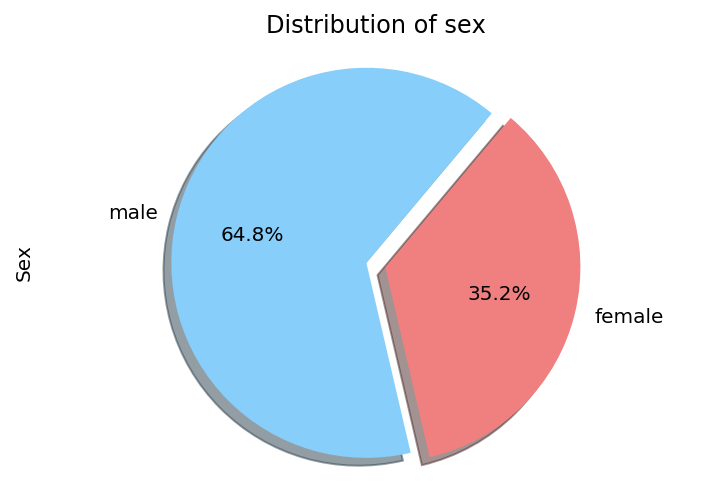

In [7]:
# 在所有乘客中，男女比例各占多少
sex_analy_data = ori_data['Sex'].value_counts()
print sex_analy_data

#labels = sex_analy_data.index
#sizes = sex_analy_data.values
colors = 'lightskyblue', 'lightcoral'
explode = 0, 0.1

# 绘制男女比例的饼图，
# 参考文章：https://www.cnblogs.com/nxld/p/7435930.html
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
sex_analy_data.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
plt.axis('equal')
plt.title('Distribution of sex');

    由以上的饼图可以看出，在所有乘客中，男性比例要大于女性比例

### 4.3 在所有生还者中，男女比例各占多少

In [8]:
# 在所有生还者中，男女比例各占多少
sex_analy_data = ori_data.loc[ori_data["Survived"] == 1]['Sex'].value_counts()
print sex_analy_data

female    233
male      109
Name: Sex, dtype: int64


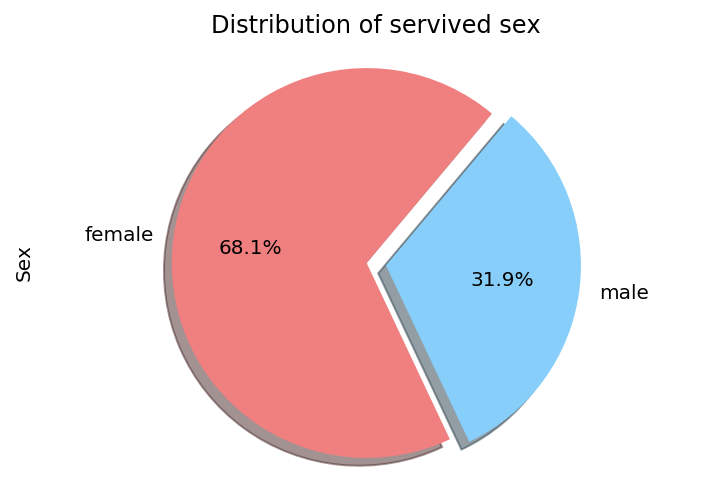

In [9]:
#labels = sex_analy_data.index
#sizes = sex_analy_data.values
colors = 'lightcoral', 'lightskyblue'
explode = 0, 0.1
# 绘制男女比例的饼图，
# 参考文章：https://www.cnblogs.com/nxld/p/7435930.html
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)

sex_analy_data.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
plt.axis('equal')
plt.title('Distribution of servived sex');

    由以上的饼图可以看出，在所有生还者中，女性比例要大于男性比例，
    对比所有乘客的男女比例数据，可以猜测生还概率可能与性别有相关性。
    大胆的猜测原因，先上救生艇的是女性，女性水性比男性更好，女性在绝望的环境下能产生更强的精神力去等待援救。
_注：此结论只针对于泰坦尼克号上的数据，并不能因此推断女性更容易获救，
    如若要证明此项结论是否具有普遍性，需要研究更多的沉船事故数据_

### 4.4 生还概率与船舱等级是否有相关性

In [10]:
pclass_ori_data = ori_data.groupby(['Pclass'], as_index=True)['PassengerId'].count()
# 计算比例
pclass_ori_data = pclass_ori_data / pclass_ori_data.sum()
print pclass_ori_data

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64


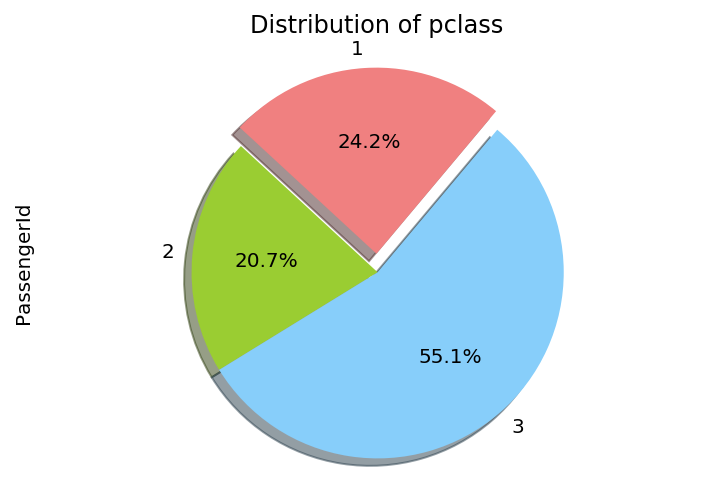

In [11]:
# labels = pclass_ori_data.index
# sizes = pclass_ori_data.values
colors = 'lightcoral','yellowgreen', 'lightskyblue'
explode = 0.1, 0, 0
# 绘制男女比例的饼图，
# 参考文章：https://www.cnblogs.com/nxld/p/7435930.html
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)

pclass_ori_data.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
plt.axis('equal')
plt.title('Distribution of pclass');

In [12]:
survived_data = ori_data.loc[ori_data["Survived"] == 1]
pclass_survived_data = survived_data.groupby(['Pclass'])['PassengerId'].count()
pclass_survived_data = pclass_survived_data / pclass_survived_data.sum()
print pclass_survived_data

Pclass
1    0.397661
2    0.254386
3    0.347953
Name: PassengerId, dtype: float64


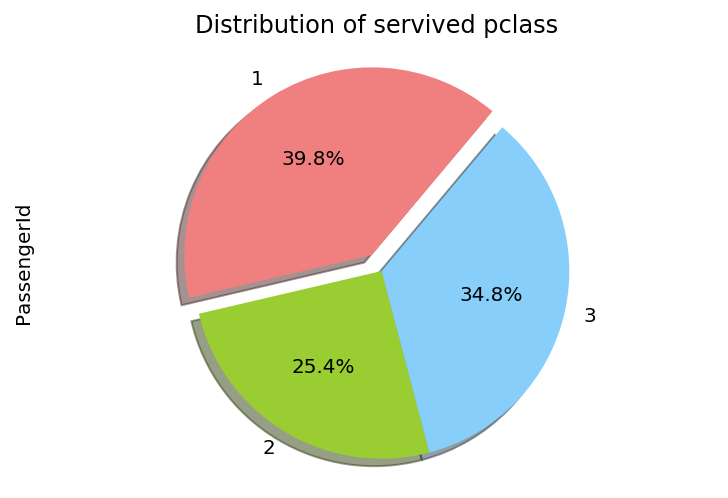

In [13]:
#labels = pclass_survived_data.index
#sizes = pclass_survived_data.values
colors = 'lightcoral','yellowgreen', 'lightskyblue'
explode = 0.1, 0, 0
# 绘制男女比例的饼图，
# 参考文章：https://www.cnblogs.com/nxld/p/7435930.html
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)

pclass_survived_data.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)
plt.axis('equal')
plt.title('Distribution of servived pclass');

In [14]:
bar_survived_pclass_data = ori_data.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()
print bar_survived_pclass_data

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


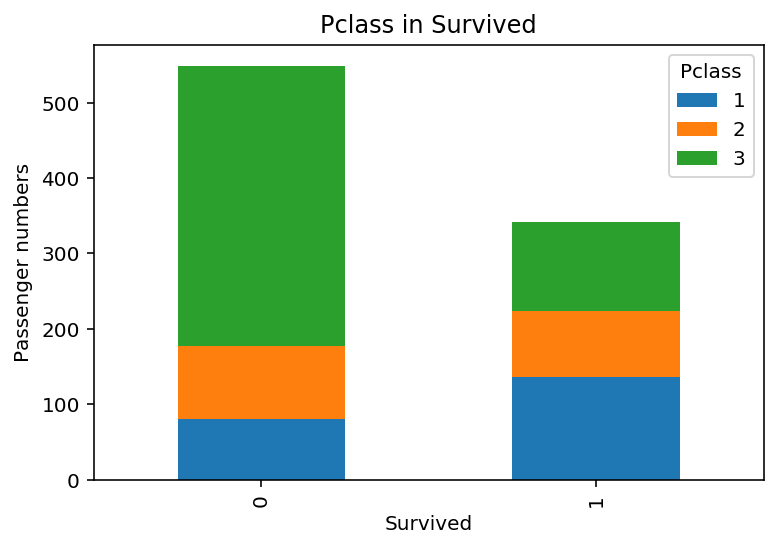

In [15]:
bar_survived_pclass_data.plot(kind='bar',stacked="True")
plt.ylabel("Passenger numbers")
plt.title("Pclass in Survived");

    由两个饼图的对比结果，以及柱状图可以看出，1级船舱在生还者中的比例要大于1级船舱在全体人员的比例，
    可以猜测生还概率可能与船舱等级有相关性。
    大胆的猜测原因，1级船舱在船更靠上的部位，更容易逃生。
_注：此结论只针对于泰坦尼克号上的数据，并不能因此推断1级船舱更容易获救，
    如若要证明此项结论是否具有普遍性，需要研究更多的沉船事故数据_

In [16]:
## pearson相关系数
corr_result = ori_data.corr()
corr_result.loc['Survived']['Pclass']

-0.33848103596101586

    同时，根据统计计算得出，生还概率与船舱等级有着0.338的负相关性，
    即在泰坦击尼克号上发生的沉船事故中，船舱等级越低越容易生还。
_注：此结论只针对于泰坦尼克号上的数据，并不能因此推断所有低等级的船舱更安全，
    如若要证明此项结论是否具有普遍性，需要研究更多的沉船事故数据_

### 4.5 生还概率与父母子女数量是否有相关性

In [17]:
corr_result.loc['Survived']['SibSp']

-0.03532249888573588

    根据统计计算得出，生还概率与父母子女数量的相关性很小。
_注：此结论只针对于泰坦尼克号上的数据，并不能因此推断父母女子数量与沉船时的生存概率无关，
    如若要证明此项结论是否具有普遍性，需要研究更多的沉船事故数据_

## 5. 得出结论

在泰坦尼克号数据中，我们发现了一些有趣的现象，并根据统计学进行计算，得出如下结论
1. 乘客年龄与票价没有显著的相关性
2. 在所有乘客中，男性占比64.8%，女性占比35.2%
3. 在所有生还者中，男性占比31.9%，女性占比68.1%
4. 生还概率与船舱等级有着0.338的负相关性
5. 生还概率与父母子女数量没有显著的相关性

_注：此结论只针对于泰坦尼克号上的数据，如若要证明这些结论是否具有普遍性，需要研究更多的沉船事故数据_